# Encoder / Decoder

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
import qiskit
from qiskit import visualization, QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
%matplotlib inline
from math import pi
from Circuits import getBloch, stateGenerator, getMeasure, makeCirc, makeCirc2

In [3]:
backend = Aer.get_backend('statevector_simulator')

100011


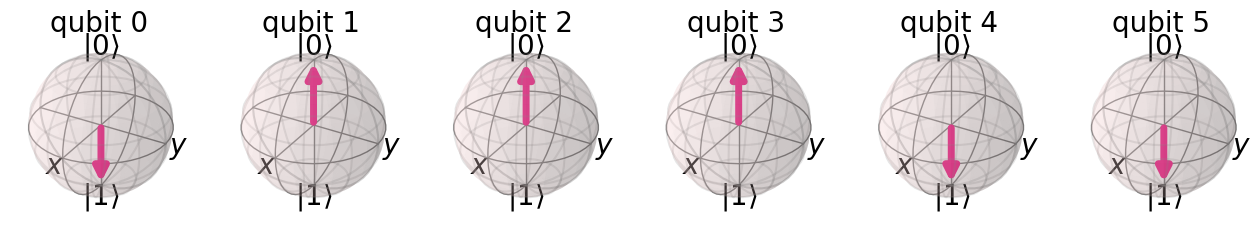

In [4]:
encoderCirc = makeCirc2(6, 0, 2, '1000')
getBloch(encoderCirc, backend)

In [5]:
encoderCirc.x(0)
encoderCirc.x(1)
encoderCirc.x(2)
encoderCirc.ccx(0, 1, 4)
encoderCirc.ccx(0, 2, 5)

for i in range(4, 6):
    encoderCirc.measure(i, i)

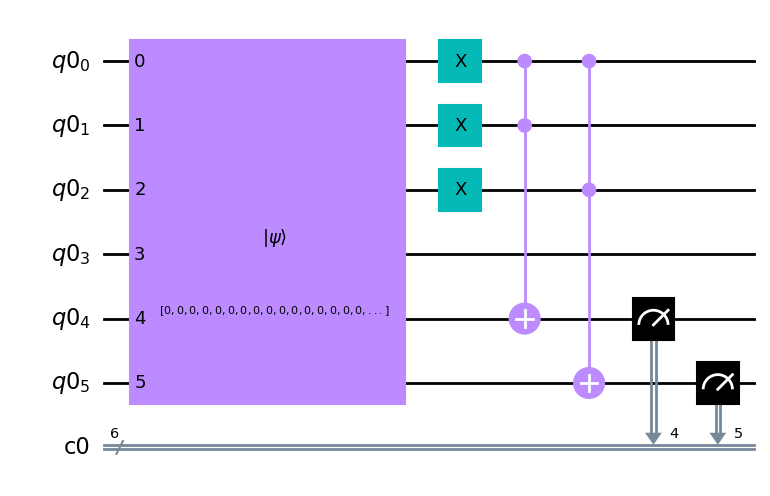

In [6]:
encoderCirc.draw('mpl')

In [7]:
getMeasure(encoderCirc, 1, backend)[0][::-1][4:]

'11'

In [8]:
decoderCirc = makeCirc2(4, 1, 1, '10')

1001


In [9]:
decoderCirc.cx(0, 3)
decoderCirc.ccx(1, 3, 2)
decoderCirc.cx(2, 1)
decoderCirc.cx(2, 3)
decoderCirc.swap(0, 1)
decoderCirc.cx(0, 1)

for i in range(0, 4):
    decoderCirc.measure(i, i)

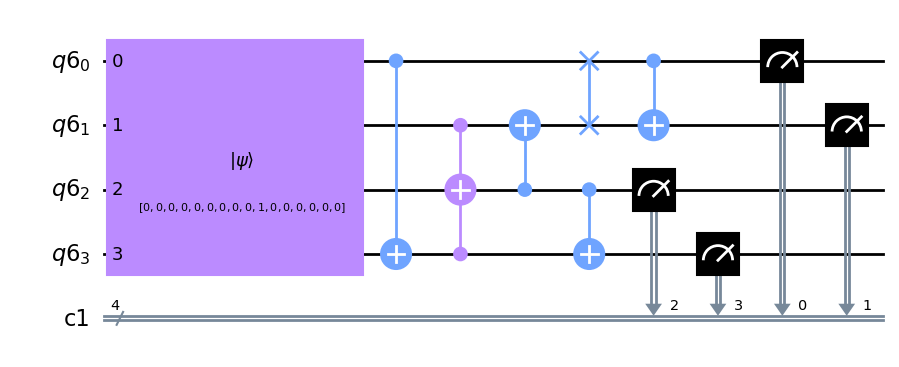

In [10]:
decoderCirc.draw('mpl')

In [11]:
getMeasure(decoderCirc, 1, backend)[0][::-1]

'0100'

In [12]:
#encoder gate

In [13]:
encCirc = QuantumCircuit(6)
encCirc.x(0)
encCirc.x(1)
encCirc.x(2)
encCirc.ccx(0, 1, 4)
encCirc.ccx(0, 2, 5)

In [14]:
Encoder = encCirc.to_gate(label = ' Encoder')

In [15]:
#decoder gate

In [16]:
decCirc = QuantumCircuit(4)
decCirc.cx(0, 3)
decCirc.ccx(1, 3, 2)
decCirc.cx(2, 1)
decCirc.cx(2, 3)
decCirc.swap(0, 1)
decCirc.cx(0, 1)

In [17]:
Decoder = decCirc.to_gate(label=' Decoder')

In [18]:
#circuit

In [19]:
circuit = QuantumCircuit(12)
circuit.append(Encoder, [0, 1, 2, 3, 4, 5])
circuit.append(Decoder, [6, 7, 8, 9])

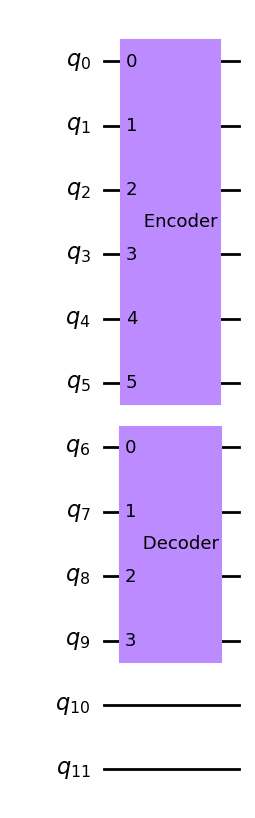

In [20]:
circuit.draw('mpl')